In [15]:
# IQVIA programming challenge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.mlab as mlab
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import docx 
from docx import Document

from docx.shared import Mm
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.enum.text import WD_BREAK
#from docx.enum.table import WD_ALIGN_HORIZONTAL
from docx2pdf import convert
import shap

data = pd.read_csv("C:/Users/KatherineRidley/Downloads/DS_test/data.csv")
doc = docx.Document()
doc.add_heading('IQVIA Data Science Exercise', 0)
doc.add_heading('Katherine Ridley, 15/07/22', 1)
doc.add_heading('Exploring the Dataset', 3)
p=doc.add_paragraph()


## Instructions:

Our client is a healthcare company. Whilst it is particularly difficult for human experts to identify certain types of cancer at early stages, the client is keen to understand risk factors for cancer patients. This means having a good model for patients at risk of having cancer. They have shared  with IQVIA a sample of anthropometric and blood test data in CSV format that they would like you to analyse.
Each row corresponds to a patient, the “label” column records whether the patient was diagnosed with breast cancer (“label” = 2) or not (“label” = 1). 
The client has informed you that the other columns should be self-explanatory.

In [16]:
# Exploring the dataset
print(data.head())
print(data.info())
print(data.describe())
print(len(data))

    Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0  45.0  26.850000     92.0    3.330  0.755688  54.6800    12.100000   
1  49.0  21.367521     78.0    2.640  0.507936   6.3339     3.886145   
2  72.0  25.590000     82.0    2.820  0.570392  24.9600    33.750000   
3  44.0  20.760000     86.0    7.553  1.600000  14.0900    20.320000   
4  47.0  22.030000     84.0    2.869  0.590000  26.6500    38.040000   

   Resistin    MCP.1  Label  
0  10.96000  268.230      2  
1  22.94254  737.672      2  
2   3.27000  392.460      2  
3   7.64000   63.610      1  
4   3.32000  191.720      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          111 non-null    float64
 1   BMI          115 non-null    float64
 2   Glucose      115 non-null    float64
 3   Insulin      113 non-null    float64
 4   HOMA         113 non-null

In [17]:
#  What proportion of patients with identified cancer are below 50 years of age?
total_label2 = len(data[data["Label"] == 2])
total_label2_under50 = len(data[(data['Age'] < 50) & (data['Label'] == 2)])

print('Percentage of patients with identified cancer who are under 50:', ((total_label2_under50/total_label2)*100), '%')
proportion_under50 = ((total_label2_under50/total_label2)*100)
p.add_run('Percentage of patients with identified cancer who are under 50: ' + str(proportion_under50) + '%')


Percentage of patients with identified cancer who are under 50: 43.75 %


In [18]:
# What is the standard deviation of resistin?

data['Resistin'].mean()
data['Resistin'].std()

print('The standard deviation of Resistin is:', data['Resistin'].std())

p=doc.add_paragraph('What is the standard deviation of resistin?')
p.add_run('{}'.format(data['Resistin'].std())).bold=True

The standard deviation of Resistin is: 12.390645677659526


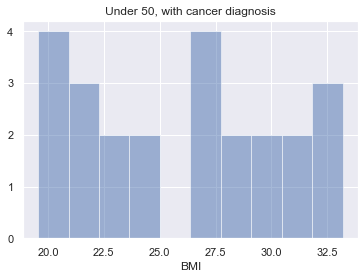

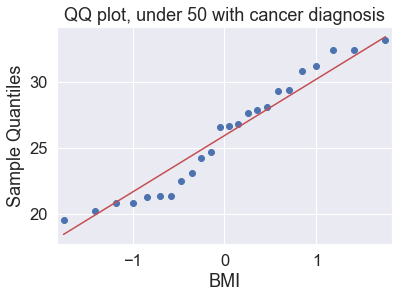

('Length of the under 50 label 2 data:', 24, ', Test Statistic:', 0.9314334988594055, ',p-value:', 0.10495401173830032, ',Comments:', 'Sample looks Gaussian (fail to reject H0)')


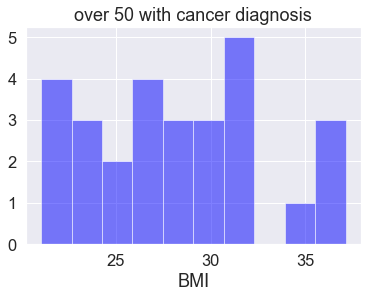

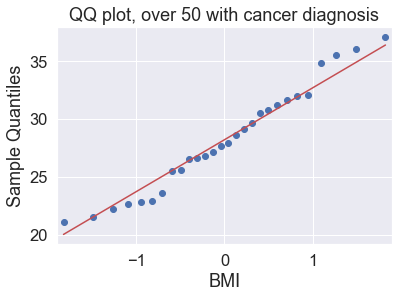

('Length of the over 50 label 2 data:', 28, ', Test Statistic:', 0.9619835615158081, ',p-value:', 0.3881329596042633, ',Comments:', 'Sample looks Gaussian (fail to reject H0)')


In [32]:
# Compare the distribution of BMI for patients identified with cancer over 50, to the distribution of BMI for patients identified with cancer who are under 50. 

# What if you consider only the people in the 50+ group who have increased fasting blood glucose (Glucose) and insulin (Insulin)?

## plotting and comparing distributions for cancwer patients over and under 50.
data_l2_u50 = data[(data['Label'] == 2) & (data['Age'] < 50)]
data_l2_o50 = data[(data['Label'] == 2) & (data['Age'] > 50)]
n, bins, patches = plt.hist(data_l2_u50['BMI'] , bins=10, alpha=0.5, label='under 50')
plt.title('Under 50, with cancer diagnosis')
plt.xlabel('BMI')
plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/BMI_under50_hist.png')
sns.set(font_scale=1.5)
qqplot_data = qqplot(data_l2_u50['BMI'], line='s').gca().lines
plt.title('QQ plot, under 50 with cancer diagnosis')
plt.xlabel('BMI')
plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/BMI_under50_qq.png')
plt.show()

# shapiro statistics show us if the data is normally distributed
stat, p = shapiro(data_l2_u50['BMI'])
 
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
shapiro_str=('Length of the under 50 label 2 data:',len(data_l2_u50['BMI']), ', Test Statistic:', stat, ',p-value:', p, ',Comments:', msg)

## Plugging the plots and stats into our word document
print(shapiro_str)
p_str='p-value:', p
doc.add_heading('Compare the distribution of BMI for patients identified with cancer over 50, to the distribution of BMI for patients identified with cancer who are under 50?', 3)

p=doc.add_paragraph('Distribution of BMI for patients identified with cancer under 50:')
r = p.add_run()
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/BMI_under50_hist.png', width = Mm(80))
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/BMI_under50_qq.png', width = Mm(80))
p=doc.add_paragraph('     ')

p=doc.add_paragraph(('Length of the under 50 label 2 data: ',str(len(data_l2_u50['BMI']))))
p=doc.add_paragraph(('Test Statistic: ', str(stat)))
p=doc.add_paragraph(str(p_str))
p=doc.add_paragraph(('Comments: ', str(msg)))


# Repeating above for the 50+ group
plt.hist(data_l2_o50['BMI'], bins=10, color='blue', alpha=0.5, label='over 50')
plt.title('over 50 with cancer diagnosis')
plt.xlabel('BMI')
plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/BMI_over50_hist.png')

qqplot_data = qqplot(data_l2_o50['BMI'], line='s').gca().lines
plt.xlabel('BMI')
plt.title('QQ plot, over 50 with cancer diagnosis')
plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/BMI_over50_qq.png')
plt.show()
stat, p = shapiro(data_l2_o50['BMI'])


alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
shapiro_str=('Length of the over 50 label 2 data:',len(data_l2_o50['BMI']), ', Test Statistic:', stat, ',p-value:', p, ',Comments:', msg)
p_str='p-value:', p
print(shapiro_str)
p=doc.add_paragraph('     ')

p=doc.add_paragraph('Distribution of BMI for patients identified with cancer over 50:')
r=p.add_run()
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/BMI_over50_hist.png', width = Mm(80))
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/BMI_over50_qq.png', width = Mm(80))
p=doc.add_paragraph(('Length of the over 50 label 2 data:',str(len(data_l2_o50['BMI']))))
p=doc.add_paragraph((', Test Statistic:', str(stat)))
p=doc.add_paragraph(str(p_str))
p=doc.add_paragraph((',Comments:', str(msg)))

# Leaving spaces between sections for formatting
p=doc.add_paragraph('     ')



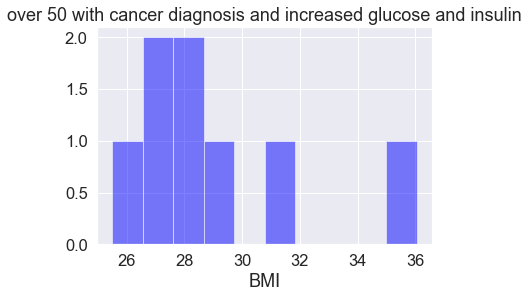

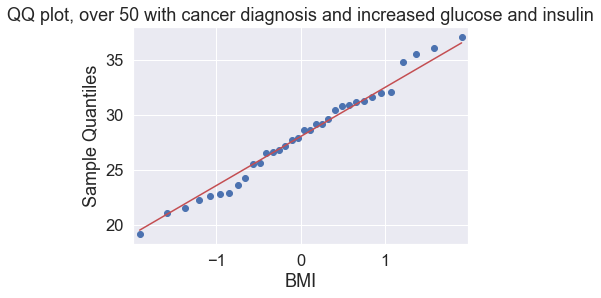

('Length of the over 50 label 2 with increased glucose and insulin data:', 8, ', Test Statistic:', 0.8521837592124939, ',p-value:', 0.10023899376392365, ',Comments:', 'Sample looks Gaussian (fail to reject H0)')


In [30]:
#consider only the people in the 50+ group who have increased fasting blood glucose (Glucose) and insulin (Insulin)?


g_mean = data['Glucose'].mean()
i_mean = data['Insulin'].mean()

data_l2_o50_g_i = data[(data['Label'] == 2) & (data['Age'] > 50) & (data['Glucose'] > g_mean) & (data['Insulin'] > i_mean)]
sns.set(font_scale=1.5)
plt.hist(data_l2_o50_g_i['BMI'], bins=10, color='blue', alpha=0.5, label='over 50')
plt.title('over 50 with cancer diagnosis and increased glucose and insulin')
plt.xlabel('BMI')
plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/BMI_over50_incg_i_hist.png')
qqplot_data = qqplot(data_l2_o50['BMI'], line='s').gca().lines
plt.title('QQ plot, over 50 with cancer diagnosis and increased glucose and insulin')
plt.xlabel('BMI')
plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/BMI_over50_inc_g_i_qq.png')
plt.show()
stat, p = shapiro(data_l2_o50_g_i['BMI'])

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
shapiro_str='Length of the over 50 label 2 with increased glucose and insulin data:',len(data_l2_o50_g_i['BMI']), ', Test Statistic:', stat, ',p-value:', p, ',Comments:', msg
print(shapiro_str)
p_str='p-value:', p
doc.add_heading('What if you consider only the people in the 50+ group who have increased fasting blood glucose (Glucose) and insulin (Insulin)?', 3)
p=doc.add_paragraph('Distribution of BMI for patients identified with cancer over 50 with Glucose and Insulin levels above mean average:')
p=doc.add_paragraph('     ')
r=p.add_run()
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/BMI_over50_incg_i_hist.png', width = Mm(80))
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/BMI_over50_inc_g_i_qq.png', width = Mm(80))

p=doc.add_paragraph(('Length of the over 50 label 2, with increased insulin and glucose, data: ',str(len(data_l2_o50_g_i['BMI']))))
p=doc.add_paragraph(('Test Statistic: ', str(stat)))
p=doc.add_paragraph(str(p_str))
p=doc.add_paragraph(('Comments: ', str(msg)))

# testing the doc
#doc.save('C:/Users/KatherineRidley/Downloads/DS_test/demo.docx')

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Label', 'Age bin cut'],
      dtype='object')


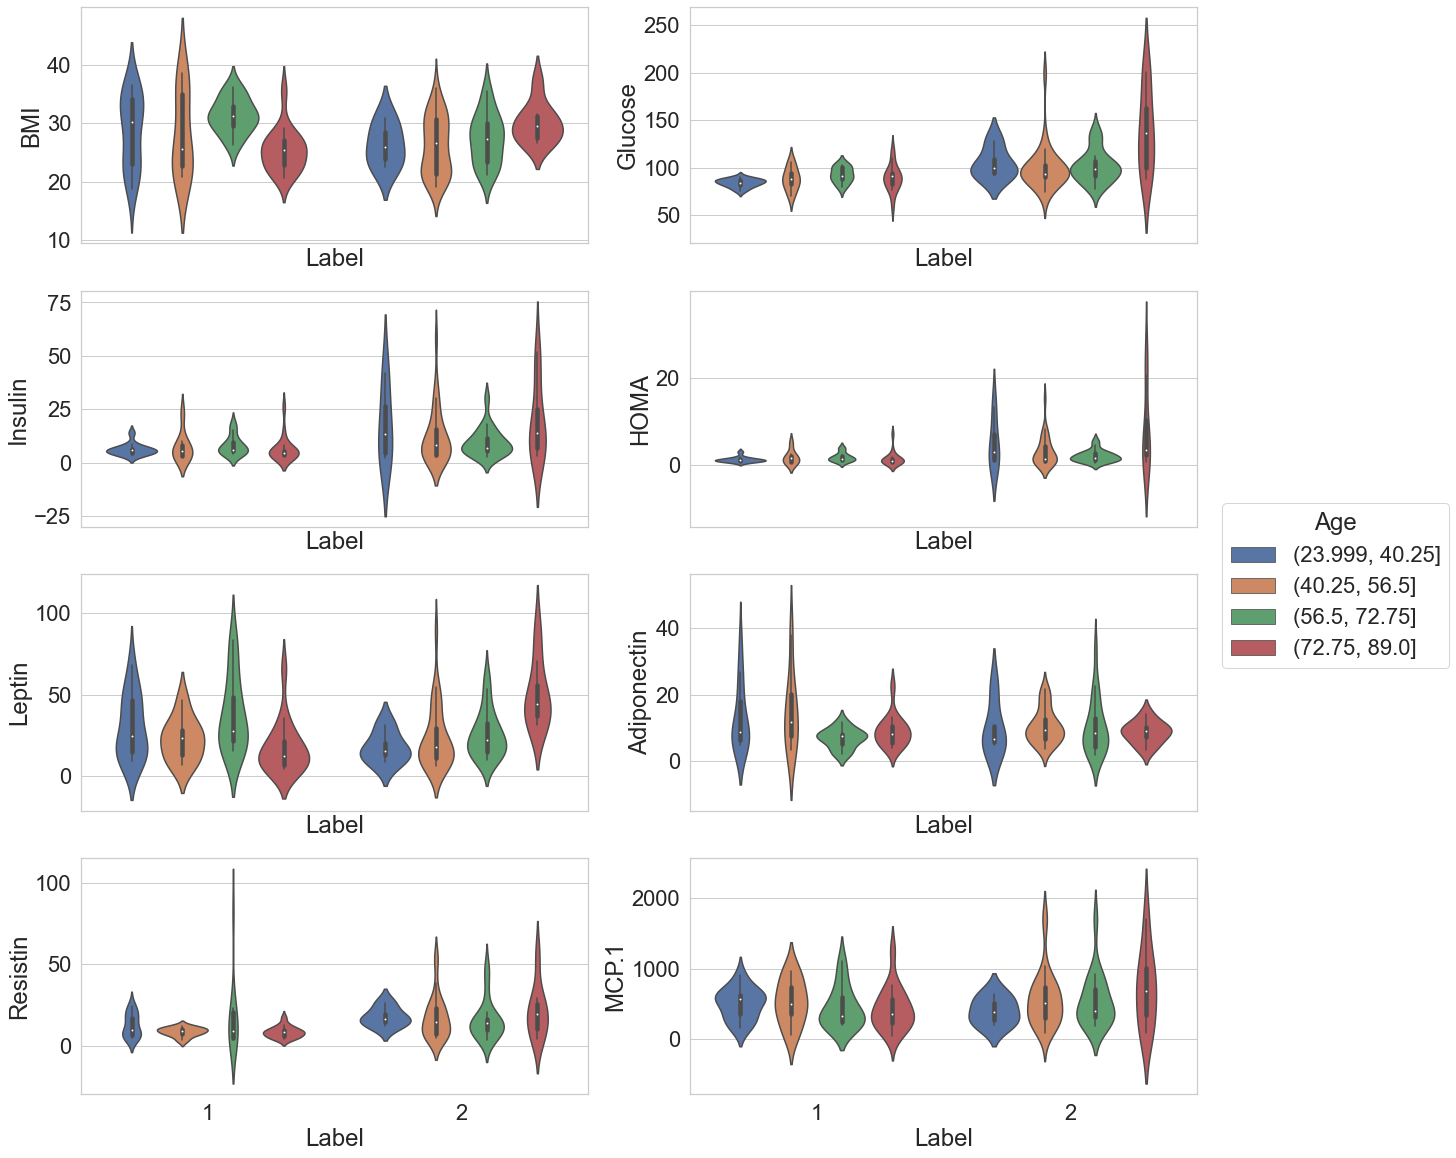

In [21]:
#  Produce summary statistics or visualisations of the data
#  Violin plots show density, mean, quartiles, can be used to compare the distribution of the data across several variables
# 
# 
# I have chosen to break down age into bins for ease of interpretation:
min_value = data['Age'].min()
max_value = data['Age'].max()
bins = np.linspace(min_value,max_value,5)

data['Age bin cut'] = pd.cut(data['Age'] , bins=bins, include_lowest=True)

# big fig of all dependent variables
fig, axes= plt.subplots(4, 2, sharex=True, figsize=(20,20))
#sns.set_context='paper'
sns.set(font_scale=2)
sns.set_style('whitegrid')


ax1=sns.violinplot(x='Label', y='BMI', hue='Age bin cut', data=data,  ax=axes[0,0], legend=False)
#plt.title('BMI distribution for patients with and without cancer by age groups')
#plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/BMI_by_age_violin.png')
ax1.legend('',frameon=False)

ax2=sns.violinplot(x='Label', y='Glucose', hue='Age bin cut', data=data, ax=axes[0,1], legend=False)
#plt.title('Glucose distribution for patients with and without cancer by age groups')
#plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/Glucose_by_age_violin.png')


ax3=sns.violinplot(x='Label', y='Insulin', hue='Age bin cut', data=data, ax=axes[1,0])
#plt.title('Insulin distribution for patients with and without cancer by age groups')
#plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/Insulin_by_age_violin.png')
ax2.legend('',frameon=False)
ax3.legend('',frameon=False)

print(data.columns)
ax4 = sns.violinplot(x='Label', y='HOMA', hue='Age bin cut', data=data, ax=axes[1,1])
#plt.title('SkinThickness distribution for patients with and without cancer by age groups')
#plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/SkinThickness_by_age_violin.png')
ax4.legend('',frameon=False)

ax5 = sns.violinplot(x='Label', y='Leptin', hue='Age bin cut', data=data, ax=axes[2,0])
#plt.title('Leptin distribution for patients with and without cancer by age groups')
#plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/Leptin_by_age_violin.png')
ax5.legend('',frameon=False)

ax6 = sns.violinplot(x='Label', y='Adiponectin', hue='Age bin cut', data=data, ax=axes[2,1])
#plt.title('Adiponectin distribution for patients with and without cancer by age groups')
#plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/Adiponectin_by_age_violin.png')
ax6.legend('',frameon=False)

ax7 = sns.violinplot(x='Label', y='Resistin', hue='Age bin cut', data=data, ax=axes[3,0])
ax7.legend('',frameon=False)
#plt.title('Resistin distribution for patients with and without cancer by age groups')
#plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/Resistin_by_age_violin.png')


ax8 = sns.violinplot(x='Label', y='MCP.1', hue='Age bin cut', data=data, ax=axes[3,1])
#plt.title('MCP.1 distribution for patients with and without cancer by age groups')
#plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/MCP.1_by_age_violin.png')
ax8.legend(title='Age', bbox_to_anchor=(1.05, 2.5), loc=2, borderaxespad=0.)

plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/violinsubplots.png')
plt.show()

doc.add_heading('Summary statistics and visualisations for patients with and without cancer', 3)

p=doc.add_paragraph('Violin plots by age and cancer status:')
r=p.add_run()
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/violinsubplots.png', width = Mm(150))






In [22]:
# Summary statistics saved as CSV files for both cancer patients and non-cancer patients in the shared folder
from pandas.plotting import table
data_l1=data[data['Label']==1]
data_l2=data[data['Label']==2]

l1_desc=data_l1.describe()
l2_desc=data_l2.describe()

print(l1_desc)
print(l2_desc)
## Are there particular groups of patients?

doc.add_heading(' Are there particular patient types?', 3)

p=doc.add_paragraph('The figure above shows anthropometric and blood test data of all patients by cancer status and age group. We can use this, and the summary statistics attached as CSVs, to comment on different patient groups within the cohort.')

p=doc.add_paragraph('Overall, we can see that Glucose, Insulin, HOMA and Resistin are increased in cancer patients (pending statistical tests). Furthermore, we can see that patients from age 72-89 have much higher blood glucose, insulin and leptin if they have cancer, in comparison to patients in that age group without cancer. Patients age 23-40 are more likely to have lower BMI and Leptin measurements, but higher insulin and glucose,  if they have cancer, in comparison to patients in that age groups without cancer. Pending statistical insights.')




             Age        BMI     Glucose    Insulin       HOMA     Leptin  \
count  49.000000  52.000000   51.000000  51.000000  51.000000  51.000000   
mean   58.224490  28.317336   88.078431   6.983922   1.568480  26.391355   
std    19.387781   5.427465   10.232972   4.894541   1.224791  19.444339   
min    24.000000  18.670000   60.000000   2.707000   0.467409   4.311000   
25%    38.000000  23.096003   82.500000   4.263000   0.898747  11.360500   
50%    66.000000  27.694389   87.000000   5.537000   1.145436  21.211700   
75%    75.000000  32.328091   92.500000   7.185000   1.796510  35.740500   
max    89.000000  38.578759  118.000000  26.211000   7.111918  83.482100   

       Adiponectin   Resistin        MCP.1  Label  
count    51.000000  52.000000    52.000000   52.0  
mean     10.354233  11.614813   499.730692    1.0  
std       7.704884  11.447053   292.242157    0.0  
min       2.194280   3.291750    45.843000    1.0  
25%       5.445953   6.597523   260.736500    1.0  
50%

In [23]:
#Have you identified problems with the provided data, and if yes how do they affect modelling?
# What are your recommendations regarding future data collection?

doc.add_paragraph('       ')
doc.add_heading('Have you identified problems with the provided data, and if yes how do they affect modelling?', 3)
doc.add_paragraph('I have identified that some of the age metrics are missing in the dataset. Age is a key effector variable in cancer prognosis, so missing values will skew our model.')
doc.add_paragraph('The data suggests that the patients with missing ages also have unusually high or low BMIs. This would add to the value of the data if the recording was complete.')
doc.add_paragraph('The HOMA score has a huge error score across the dataset, so cannot be interpreted very effectively. I would recommend removing this variable from future measurements or troubleshooting the measurement system by which it is recorded.')
doc.save('C:/Users/KatherineRidley/Downloads/DS_test/demo.docx')
doc.add_paragraph(' ')

## Creating a model
The client wants to know if the data can be used to predict the likelihood that a patient has breast cancer. You are asked to investigate this and provide a recommendation:

• Briefly discuss any assumptions made about the data

• Pre-process the data (if necessary)

• Build a proof of concept model to predict the “label” column from the customer data 

• Evaluate the performance of your model, using appropriate metrics

• How would the model perform on unseen data?

The client is also interested in interpreting the mode

In [24]:
doc.add_heading('Creating a model', 3)
doc.add_heading('Discuss any assumptions made about the data', 4)
doc.add_paragraph('We assume as researchers, that the data is normally distributed, that the variables have been recorded under the same conditions for each participant, that each participant is independent from another, that each entry holds a useful value, and that the data is not contaminated with outliers.')
#doc.save('C:/Users/KatherineRidley/Downloads/DS_test/demo.docx')
doc.add_paragraph(' ')

In [25]:
# employing logreg model to predict cancer status
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

## Preprocessing the data

data.dropna(inplace=True)
#print(len(data))
#dropping label as this is the y variable, dropping age bins as they represent Age which is included. 
xdata=data.drop(['Label', 'Age bin cut'], axis=1)
features = xdata.columns
y=data['Label']
x= data[features]

#preprocessing scaler so each variable is comparable later on
x = preprocessing.scale(x)

## Define the model
## L1 regularised logistic regression
logreg = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')

## Build a proof of concept model to predict the 'label' column

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logreg.fit(X_train, y_train)
#predict the test set
y_pred = logreg.predict(X_test)
#print(y_test, y_pred)

# Evaluate the performance of the model
# conf matrix calculates true and false negatives and positives
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

## Score the model by cross-validation
scores=cross_val_score(logreg, x, y, cv=10)
print(scores)
print('cross validation accuracy:', scores.mean())

doc.add_heading('Processing data, predicting cancer status and evaluating performance of our predictive model', 3)

doc.add_paragraph('We have created a predictive model using logistic regression. We have used the following features:')
doc.add_paragraph('Glucose, Insulin, HOMA, Resistin, BMI, Leptin, MCP.1, Age')
doc.add_paragraph('We have scaled our features to make them comparable, used a logistic regression model with L1 regularisation to control for overfitting, and split our dataset into x and y train and test buckets.')
p=doc.add_paragraph('We then trained our model on the x train and y train buckets, and tested it on the x test and y test buckets. We were then able to evaluate the performance of our model by accuracy scoring and cross-validation.')




[[ 5  1]
 [ 3 11]]
Accuracy: 0.8
Precision: 0.625
Recall: 0.8333333333333334
[0.7        0.9        0.8        0.7        0.8        0.5
 0.7        0.77777778 0.88888889 0.55555556]
cross validation accuracy: 0.7322222222222223


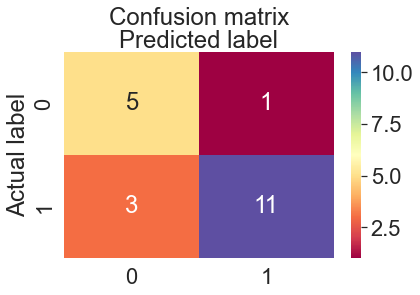

In [26]:
## Visualising the confusion matrix

class_names=[1, 2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Spectral', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/confusion_matrix.png', dpi=1500)


## Adding it into the doc 


doc.add_heading('Evaluating the model', 4)
p=doc.add_paragraph('')

p=doc.add_paragraph(('Accuracy:', str(metrics.accuracy_score(y_test, y_pred))))
p=doc.add_paragraph(('Precision:', str(metrics.precision_score(y_test, y_pred))))
p=doc.add_paragraph(('Recall:', str(metrics.recall_score(y_test, y_pred))))

r=p.add_run()

r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/confusion_matrix.png')


p=doc.add_paragraph('We can see that our model has a high accuracy score, and a high recall score of 0.83. We have a high true positive rate and a slightly higher false negative rate than false positive. This means that our model is more likely to classify someone as healthy, when they should be in the cancer group, than vice versa.')


doc.add_heading('Cross validation', 4)
p=doc.add_paragraph('Cross validation is a method of evaluating the performance of a model by testing it on continuous subsets of the data. We have used 10 folds to evaluate our model.')
doc.add_paragraph('The accuracy scores from the 10 validation exercises are:')
p=doc.add_paragraph(str(scores))
p=doc.add_paragraph('The mean accuracy score is: ')
p.add_run(str(scores.mean()))

#test save
doc.save('C:/Users/KatherineRidley/Downloads/DS_test/demo.docx')


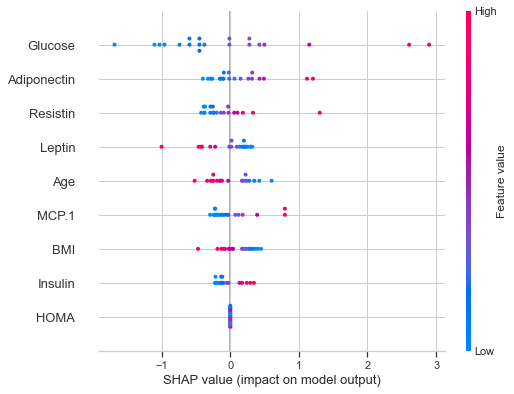

In [27]:
# shap employs a game theory approach to explain the importance of each dependent variable in the model.
exp = shap.LinearExplainer(logreg, x)
shapval=exp.shap_values(X_test)
plot=shap.summary_plot(shapval, X_test, features, plot_size=(8,6))
#plot.savefig('C:/Users/KatherineRidley/Downloads/DS_test/shap_values.png')


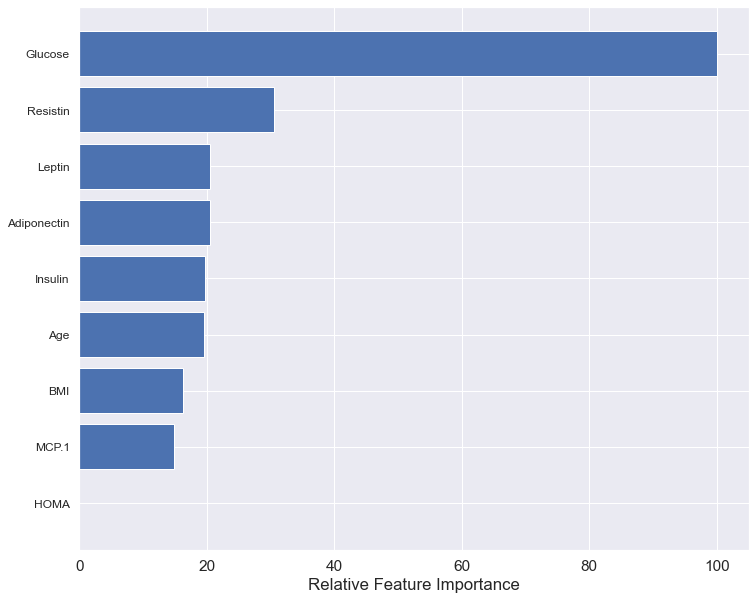

In [48]:
## Using the absolutel values of the features coefficients to assess  feature importance 

feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
sns.set(font_scale=1.4)

featfig = plt.figure(figsize=(12, 10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(features)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance')
doc.add_paragraph(' ')
doc.add_heading('Feature importance', 4)
plt.savefig('C:/Users/KatherineRidley/Downloads/DS_test/feature_importance.png')

## 
doc.add_paragraph('In a multivariate regression scenario, you can calculate the importance of each feature by sorting against the absolute value of the coefficient for each variable.')
p=doc.add_paragraph('We can see that blood glucose levels is the most important feature, followed by Resistin.')
r=p.add_run()
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/feature_importance.png')

doc.add_paragraph(' ')
doc.add_heading('SHAP values', 4)
p=doc.add_paragraph('The absolute values of the coefficients do not tell us the direction of the effect. We can dissect the SHAP values to show us the directionality and importance of each feature.')
r=p.add_run()
r.add_picture('C:/Users/KatherineRidley/Downloads/DS_test/shap_values.png')

p=doc.add_paragraph('   ')
p.add_run('Cool challenge, thanks for reading!').italic=True
doc.add_paragraph('Katherine Ridley, 15/07/22')



In [50]:

doc.save('C:/Users/KatherineRidley/Downloads/DS_test/KR_IQVIA_Exercise_answers_2.docx')
convert('C:/Users/KatherineRidley/Downloads/DS_test/KR_IQVIA_Exercise_answers_2.docx', 'C:/Users/KatherineRidley/Downloads/DS_test/KR_IQVIA_Exercise_answers_2.pdf')



100%|██████████| 1/1 [00:56<00:00, 56.61s/it]
